
# Import Essential Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

# Text Classification using Machine Learning Models


### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.


# Text Classification Exercise


Load Dataset

In [4]:
df = pd.read_csv('/content/trum_tweet_sentiment_analysis.csv')

In [5]:
df.columns

Index(['text', 'Sentiment'], dtype='object')

In [18]:
assert 'text' in df.columns and 'Sentiment' in df.columns, "Dataset must contain 'text' and 'sentiment' columns."



# Cleaning and Tokenization


Helper Functions

In [7]:
def lower_case(text):
  return text.lower()

In [8]:
def remove_url(text):
  return re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

In [9]:
def remove_mentions(text):
  return re.sub(r'@\w+', '', text)

In [11]:
def remove_punctuations(text):
  return text.translate(str.maketrans('', '', string.punctuation))

In [12]:
def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
  return tokens

In [13]:
def lemmatize_words(tokens):
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return tokens


In [14]:
def stemm_words(text):
  porter = PorterStemmer()
  stemm_tokens = []
  for word in text:
    stemm_tokens.append(porter.stem(word))
  return stemm_tokens


Build a Text Cleaning Pipeline

In [15]:
def text_cleaning_pipeline(text, rule = "lemmatize"):
  text = lower_case(text)

  text = remove_url(text)

  text = remove_mentions(text)

  text = remove_punctuations(text)

  tokens = word_tokenize(text)

  tokens = remove_stopwords(tokens)

  tokens = lemmatize_words(tokens)

  return " ".join(tokens)


In [16]:
df['clean_text'] = df['text'].apply(text_cleaning_pipeline)


Train Test Split

In [20]:
df['Sentiment'] = df['Sentiment'].fillna(df['Sentiment'].mode()[0])
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], test_size=0.2, random_state=42, stratify=df['Sentiment'])


TF-IDF Vectorization

In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Model Training and Evaluation

Model Training

In [22]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)


Evaluation

In [23]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     43751
         1.0       0.93      0.88      0.90     21736

    accuracy                           0.94     65487
   macro avg       0.93      0.92      0.93     65487
weighted avg       0.94      0.94      0.94     65487



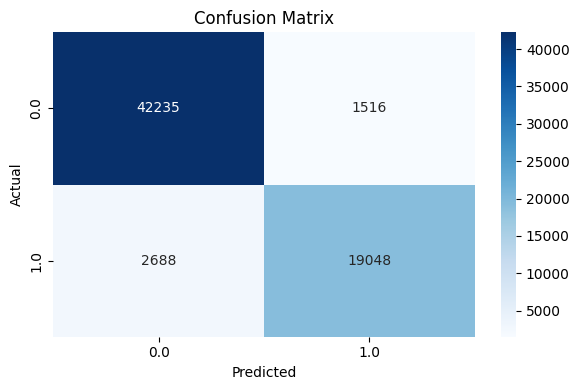

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [25]:
pred_df = pd.DataFrame({
    'Cleaned Text': X_test,
    'Actual Sentiment': y_test,
    'Predicted Sentiment': y_pred
})
pred_df.head()


,Cleaned Text,Actual Sentiment,Predicted Sentiment
59393,rt trump gut program track sort terrorist blew...,1.0,0.0
163372,rt candy stallworth visit trump,0.0,1.0
251105,rt jesus wandered around desert forty day use ...,0.0,0.0
46455,rt breaking president trump responds kristenst...,0.0,0.0
28789,rt trump defends killer putin national tv thin...,0.0,0.0
